In [1]:
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import plotly.figure_factory as ff
from dash.dependencies import Input, Output
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<AxesSubplot:>

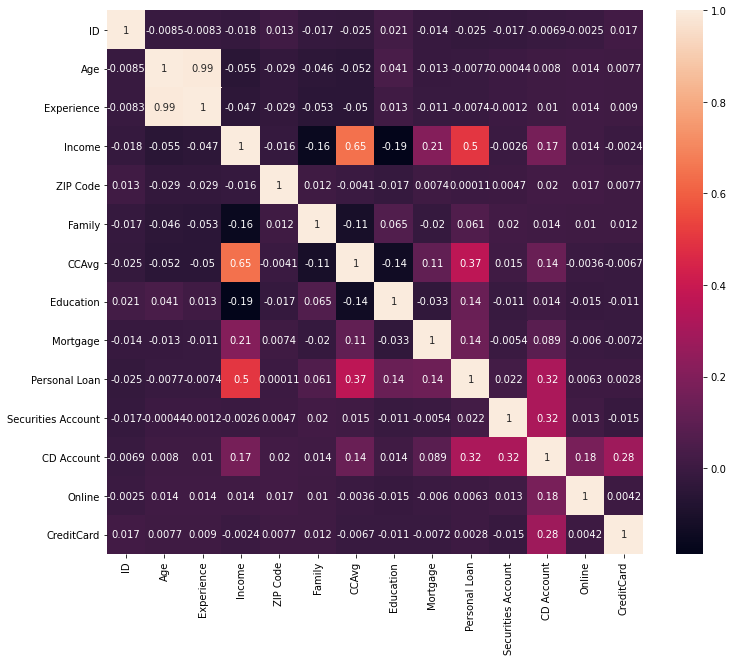

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [5]:
def mark(x):
    if x==1:
        return 'Undergrad'
    elif x==2:
        return 'Graduate'
    else:
        return 'Advanced/Professional'
    
df['Edu_mark']=df['Education'].apply(mark)

In [6]:
def mark2(x):
    if x==1:
        return 'Family Member : 1'
    elif x==2:
        return 'Family Member : 2'
    elif x==3:
        return 'Family Member : 3'
    else:
        return 'Family Member : 4'
    
df['Family_mark']=df['Family'].apply(mark2)

In [7]:
def mark3(x):
    if x==0:
        return 'No Loan'
    else:
        return 'Loan'
    
df['PL_mark']=df['Personal Loan'].apply(mark3)

In [8]:
pie = px.pie(df,names = 'PL_mark',title='Pie chart')
#pie.update_layout(title={'font':{'size':50},'xanchor':'center'})
bar = px.bar(df.groupby('Personal Loan').count().reset_index() , x = 'Personal Loan' , y='ID' , labels = {'ID':'count'} , title='Bar Chart')
#bar.update_layout(title={'font':{'size':50},'xanchor':'center'})
box0=px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
pie2 = px.pie(df.groupby('Family_mark').count().reset_index(), names = 'Family_mark' , values = 'Personal Loan' , title='Pie Chart')
bar2 = px.histogram(df, x='Family', color='Personal Loan', title='Bar Chart', nbins = 7 , barmode='stack')
boxplot = px.box(df,x='Edu_mark',y='Income',color='Personal Loan' , title='Box chart' , labels = {'Edu_mark':'Education'}) 
#bar2 = px.bar(df.groupby('Family').count().reset_index() , x = 'Family' , y = 'Personal Loan' )
pie3 = px.pie(df.groupby('Edu_mark').count().reset_index(), names = 'Edu_mark' , values = 'Personal Loan')
df4 = df.groupby(['CCAvg','Personal Loan'])['Income'].mean().reset_index()
line = px.area(df4, x='CCAvg' , y='Income' , color = 'Personal Loan')

In [9]:
Edu = df['Edu_mark'].unique()
Edu

array(['Undergrad', 'Graduate', 'Advanced/Professional'], dtype=object)

In [10]:
df['CD Account'] = df['CD Account'].astype("string")

In [11]:
app.layout = html.Div([
    html.Div([
        #html.H3("Pie chart"),
        dcc.Graph(id='pie 1' , figure = pie , className = "six columns"),  
#         html.H3("Bar chart"),
        dcc.Graph(id = 'bar 1' , figure = bar , className = "six columns")
    ],className = "row"),
    dcc.Graph(id = 'Box 0' , figure = box0 ),
    html.Div([
#         html.H3("Pie chart"),
        dcc.Graph(id='pie 2' , figure = pie2 , className = "six columns"),  
#         html.H3("Bar chart"),
        dcc.Graph(id = 'bar 2' , figure = bar2 , className = "six columns")
    ],className = "row"),
    dcc.Graph(id = 'bar 5' , figure = boxplot ),
#     dcc.Graph(id = 'pie 3' , figure = pie3),
    dcc.Graph(id = 'line' , figure = line),
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": x, "value": x} for x in Edu],
        #options={"label": 'Undergrad', "value": 'Undergrad'},
        value='Undergrad',
        clearable=False,
    ),
    dcc.Graph(id="bar-chart"),
])

@app.callback(
    Output("bar-chart", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(Edu1):
    mask = df["Edu_mark"] == Edu1
    fig = px.bar(
        df[df['Edu_mark'] == Edu1].groupby(['PL_mark','CD Account']).sum()['Income'].reset_index(), 
        x="PL_mark", y="Income",barmode='group', color='CD Account', labels = {'PL_mark':'Personal Loan'})
    return fig

In [ ]:
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Oct/2021 21:49:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "GET /_favicon.ico?v=1.21.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "GET /_dash-component-suites/dash_core_components/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "GET /_dash-component-suites/dash_core_components/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2021 21:49:29] "GET /_dash-component-suites/dash_core_components/async-plotlyjs.js HTTP/1.1" 200 -
